In [44]:
#height weight simple linear regression model

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score


In [46]:
df=pd.read_csv("../Data/height-weight.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [48]:
df.shape

(23, 2)

In [49]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


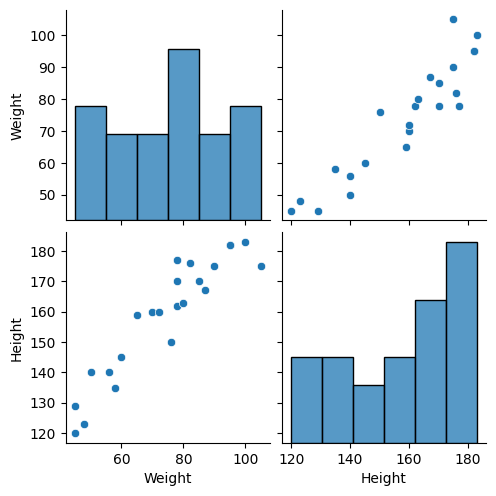

In [50]:
sns.pairplot(df)
plt.show()

In [51]:
X=df["Weight"]
type(X)

pandas.core.series.Series

In [52]:
X


0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [53]:
X=df[["Weight"]]
type(X) # trining feature should be in Dataframe format

pandas.core.frame.DataFrame

In [54]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [55]:
y=df[["Height"]]
type(y)

pandas.core.frame.DataFrame

In [69]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("score ",model.score(X_train,y_train))
print("r2_score ",r2_score(y_test,y_pred))
print("mean_squared_error ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error ",mean_absolute_error(y_test,y_pred))
print("coef_ ",model.coef_)
print("intercept_ ",model.intercept_)

score  0.9111600878129013
r2_score  0.8074173081896228
mean_squared_error  91.42562383241707
mean_absolute_error  8.332521348806655
coef_  [[1.04247865]]
intercept_  [81.49186191]


In [58]:
# trian model after applied scaling on wights :standard scalar ---> Z score =xi-mue/sd

In [70]:
X_train.describe()

,Weight
count,15.00000
mean,71.60000
std,16.15461
min,45.00000
25%,58.00000
50%,76.00000
75%,83.50000
max,95.00000


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train) 
X_train

array([[ 0.41007671],
       [-1.51215787],
       [ 1.49934297],
       [-1.70438132],
       [-0.74326404],
       [-0.10251918],
       [ 0.28192774],
       [-1.3840089 ],
       [-0.99956198],
       [ 0.02562979],
       [ 1.17897054],
       [ 0.66637465],
       [ 0.85859811],
       [ 0.98674708],
       [ 0.53822568]])

##### fit means it calculates mean and SD for the given data and then transform the given data based on mean and SD
##### StandardScaler --> creates mean as o and sd as 1

In [72]:
print(type(X_train))
print(np.mean(X_train))
print(np.std(X_train))

<class 'numpy.ndarray'>
3.774758283725532e-16
1.0


In [73]:
X_test=scaler.transform(X_test) 

#### Why we are using triansform only for X_test  ?
#### It uses the same mean and sd from X_train and transfom the values. If use fit_transform, it calculates its own mean and sd. so there is no common scaling for Xtrain and X_test. And also there is a chance of data leakage of X_test data.

In [74]:
X_test

array([[ 0.41007671],
       [ 0.41007671],
       [-1.70438132],
       [ 1.49934297],
       [-0.42289161],
       [ 2.14008783],
       [-0.87141301],
       [ 1.8197154 ]])

In [76]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("score ",model.score(X_train,y_train))
print("r2_score ",r2_score(y_test,y_pred))
print("mean_squared_error ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error ",mean_absolute_error(y_test,y_pred))
print("coef_ ",model.coef_)
print("intercept_ ",model.intercept_)

score  0.9111600878129011
r2_score  0.8074173081896224
mean_squared_error  91.42562383241722
mean_absolute_error  8.332521348806658
coef_  [[16.26979346]]
intercept_  [156.13333333]


In [80]:
model1 = linear_model.Lasso(.1)# losso healps for feaure_selection
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print("score ",model1.score(X_train,y_train))
print("r2_score ",r2_score(y_test,y_pred))
print("mean_squared_error ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error ",mean_absolute_error(y_test,y_pred))
print("coef_ ",model1.coef_)
print("intercept_ ",model1.intercept_)

score  0.9111256662481734
r2_score  0.8080053857105352
mean_squared_error  91.14644321807515
mean_absolute_error  8.338928797395308
coef_  [16.16979346]
intercept_  [156.13333333]


In [81]:
model2 = linear_model.Ridge(.5) # ridge helps to reduce overfitting
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print("score ",model2.score(X_train,y_train))
print("r2_score ",r2_score(y_test,y_pred))
print("mean_squared_error ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error ",mean_absolute_error(y_test,y_pred))
print("coef_ ",model2.coef_)
print("intercept_ ",model2.intercept_)

score  0.9102119503646048
r2_score  0.809663099501685
mean_squared_error  90.35946949750476
mean_absolute_error  8.366149692393538
coef_  [[15.74496141]]
intercept_  [156.13333333]


In [86]:
model.predict(scaler.transform([[70]]))

d:\Datascience_workspace_2023\complete-machine-learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[154.51917284]])

In [87]:
# the above result is invalid 
# standardize the input
model.predict(scaler.transform([[70]]))

d:\Datascience_workspace_2023\complete-machine-learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[154.51917284]])

In [88]:
model1.predict(scaler.transform([[70]]))

d:\Datascience_workspace_2023\complete-machine-learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([154.47561941])

In [91]:
model2.predict(scaler.transform([[70]]))

d:\Datascience_workspace_2023\complete-machine-learning\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[154.51917284]])